# Prediction of diabetes with scikit-learn

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

/home/samo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Enable plotting

In [2]:
%matplotlib inline

In [3]:
sns.set()

#### About the data

### Pima Indians Diabetes Database

#### Sources:
  (a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases  
  (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu), Applied Physics Laboratory, The Johns Hopkins University
  (c) Date received: 9 May 1990  

#### Relevant Information:  
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like  
      devices.  It is a unique algorithm; see the paper for details.  

#### Number of Instances: 768  
#### Number of Attributes: 8 plus class  

#### For Each Attribute: (all numeric-valued)  
  1. Number of times pregnant  
  2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
  3. Diastolic blood pressure (mm Hg)  
  4. Triceps skin fold thickness (mm)  
  5. 2-Hour serum insulin (mu U/ml)  
  6. Body mass index (weight in kg/(height in m)^2)  
  7. Diabetes pedigree function  
  8. Age (years)  
  9. Class variable (0 or 1)  

#### Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")  
   | Class | Number of instances | 
   |-------|---------------------|
   | 0     |       500           | 
   | 1     |       268           | 

#### Brief statistical analysis:  

   | Attribute number:| Mean: | Standard Deviation:|
   |------------------|-------|--------------------|
   | 1.               |    3.8|   3.4              |
   | 2.               |  120.9|  32.0              |
   | 3.               |   69.1|  19.4              |
   | 4.               |   20.5|  16.0              |
   | 5.               |   79.8| 115.2              |
   | 6.               |   32.0|   7.9              |
   | 7.               |   0.5 |   0.3              |
   | 8.               |   33.2|  11.8              |



#### Load data and have initial look

In [4]:
df = pd.read_csv('../data/pima-indians-diabetes-data.csv', index_col=[0])

In [5]:
df.head()

,num_pregnant,plasma_glucose_c,blood_presure,skin_fold_thickness,serum_insulin,BMI,diabetes_pedigree_funct,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,num_pregnant,plasma_glucose_c,blood_presure,skin_fold_thickness,serum_insulin,BMI,diabetes_pedigree_funct,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Look at class distribution

In [7]:
len(df[df['class'] == 1]), len(df[df['class'] == 0])

(268, 500)

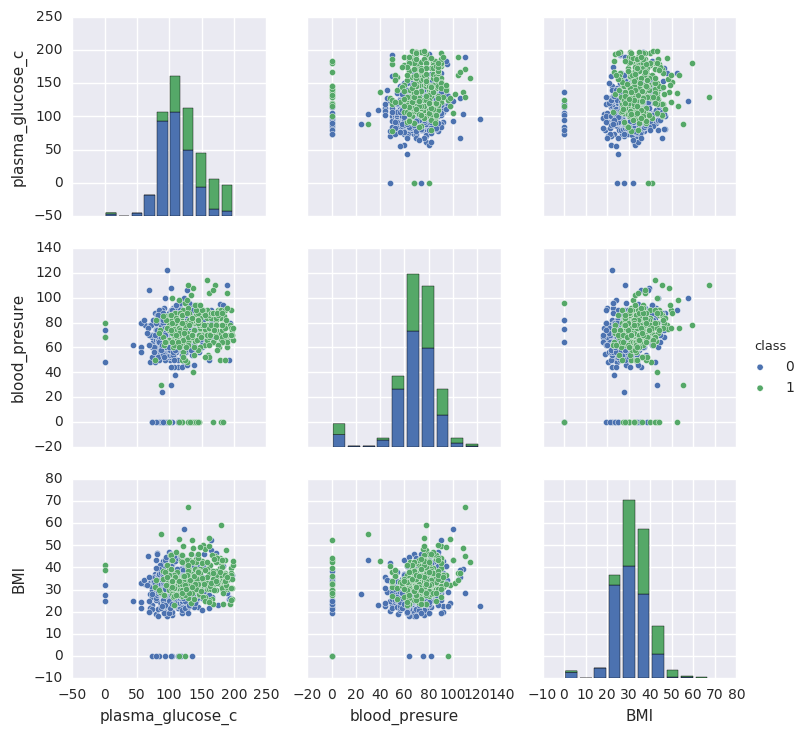

In [8]:
sns.pairplot(df, x_vars=['plasma_glucose_c', 'blood_presure', 'BMI'], 
             y_vars=['plasma_glucose_c', 'blood_presure', 'BMI'], hue='class')

Data in the table is organized the following way: 

| Samples  | Feature 1 | Feature 2 | ... | Class |
|----------|-----------|-----------|-----|-------|
| Sample 1 |     12    |    600    | ... |   1   |
| Sample 2 |      9    |    932    | ... |   0   |

#### Extract values for the machine learning.  
**X** - are features  
**y** - class, target value  

In [9]:
X = df.drop('class', axis=1).values
y = df['class'].values

#### Split the data in training and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Train the model

In [11]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### Predict **y** (class) on test set and probabilities that sample belongs to each of two classes.

In [12]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

Helper functions that facilitate plotting

In [13]:
def plot_hist(y, scores, title, size=(1.5,1.5)):
    fig = plt.figure(figsize=size, dpi=80)
    axes = fig.add_axes([0, 0, 1, 1])
    bins = np.linspace(0, 1, 11)
    axes.hist([x[0] for x in zip(scores, y) if x[1] == 1], bins, alpha=0.5, color= 'b')
    axes.hist([x[0] for x in zip(scores, y) if x[1] == 0], bins, alpha=0.5, color= 'r')
    axes.vlines(0.5, 0, np.histogram(scores, bins)[0].max(), color='black', linestyles='--')
    axes.set_ylim((0, np.histogram(scores, bins)[0].max()))
    axes.set_xlabel(title)
    axes.set_ylabel('#')
    return fig

def plot_ROC(observations, probabilities, title="", labels=True, size='auto'):
    """
    Creates ROC plot from observations (y_test) and probabilities (y_pred_proba)
    title -- title of the plot
    size -- tuple, size in inch, defaults to 'auto'
    labels -- toogle display of title and x and y labels and tick labels
    """
    if size is 'auto':
        fig = plt.figure()
    else:
        fig = plt.figure(num=None, figsize=size, dpi=80)
    axes = fig.add_axes([0, 0, 1, 1])
    fpr, tpr, thresholds = roc_curve(observations, probabilities)
    axes.plot(fpr, tpr)
    axes.plot([0, 1], [0, 1], 'k--')
    axes.set_aspect('equal')
    if labels:
        axes.set_title(title)
        axes.set_xlabel('False Positive Rate')
        axes.set_ylabel('True Positive Rate')
    else:
        axes.get_xaxis().set_ticks([])
        axes.get_yaxis().set_ticks([])
    return fig

Plot distribution of probabilities

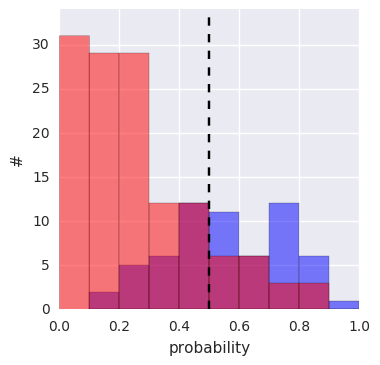

In [14]:
plot_hist(y_test, y_pred_proba.T[1], 'probability', size=(3,3));

Plot ROC curve

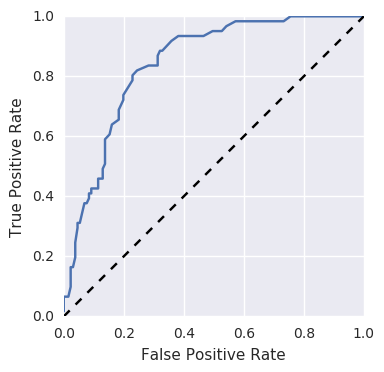

In [15]:
plot_ROC(y_test, y_pred_proba.T[1], size=(3,3));

In [16]:
print("AUC: %.3f" % roc_auc_score(y_test, y_pred_proba.T[1]))

AUC: 0.843


Calculate confusion matrix

|          | Predicted Positive | Predicted Negative|
|----------|-----------|----------|
| **Positive** |     TP    |    FN    | 
| **Negative** |     FP    |    TN    | 

In [17]:
confusion_matrix(y_test, y_pred)

array([[113,  18],
       [ 28,  33]])

In [18]:
recall_score(y_test, y_pred, pos_label=1) # Low-moderate sensitivity

0.54098360655737709

In [19]:
recall_score(y_test, y_pred, pos_label=0) # High specificity 

0.86259541984732824